In [1]:
import os
import time
import math
import re
import struct
import traceback
import codecs
import bitstring

import numpy as np
import matplotlib.pyplot as plt
import cv2

from PIL import Image
import IPython.display as display

In [2]:
os.listdir('.')

['.ipynb_checkpoints',
 'co59-utf8.txt',
 'ETL5C',
 'ETL5INFO',
 'etl_5_inspect_data.ipynb']

In [3]:
t56s = '0123456789[#@:>? ABCDEFGHI&.](<  JKLMNOPQR-$*);\'|/STUVWXYZ ,%="!'

def T56(c):
    return t56s[c]

with codecs.open('co59-utf8.txt', 'r', 'utf-8') as co59f:
    co59t = co59f.read()
    
co59l = co59t.split()
CO59 = {}
for c in co59l:
    ch = c.split(':')
    co = ch[1].split(',')
    CO59[(int(co[0]), int(co[1]))] = ch[0]

In [4]:
file_list = [
    'ETL5C',
]

In [5]:
filename = file_list[0]
file_stream = bitstring.ConstBitStream(filename=filename)

In [6]:
RECORD_LENGTH = 2952
skip = 0
file_stream.bytepos = skip * RECORD_LENGTH

In [7]:
record = file_stream.readlist(','.join([
    '2*uint:36',
    'uint:8',
    'pad:28',
    'uint:8',
    'pad:28',
    '4*uint:6', # 4 Character Code - [4:8]
    'pad:12',
    '15*uint:36',
    'pad:1008',
    'bytes:2736', # 16 Gray Level (4bit/pixel) Image Data 72(X-axis size) * 76(Y-axis size) = 5472 pixels - [23]
]))

In [8]:
print(type(record))
print(len(record))
for idx, v in enumerate(record[:-1]):
    print(f'{idx} - {v}')

<class 'list'>
24
0 - 1
1 - 6001
2 - 177
3 - 129
4 - 34
5 - 16
6 - 16
7 - 17
8 - 0
9 - 0
10 - 1
11 - 0
12 - 1
13 - 26
14 - 3552
15 - 42
16 - 750215
17 - 750217
18 - 72
19 - 76
20 - 16
21 - 100
22 - 0


In [9]:
record_dict = {
    'character': ''.join(map(T56, record[4:8])), # 4 Character Code - [4:8]
    'image_data': record[23], # 16 Gray Level (4bit/pixel) Image Data 72(X-axis size) * 76(Y-axis size) = 5472 pixels - [23]
}

In [10]:
record_dict['character']

'K  A'

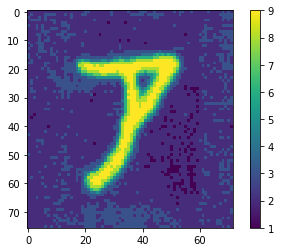

In [11]:
width = 72
height = 76
np_img = np.array(Image.frombytes('F', (width, height), record_dict['image_data'], 'bit', 4))

plt.imshow(np_img)
plt.colorbar()

In [12]:
def show_image(filename, pos=0):
    f = bitstring.ConstBitStream(filename=filename)
    f.bytepos = pos * 2952
    r = f.readlist('2*uint:36,uint:8,pad:28,uint:8,pad:28,4*uint:6,pad:12,15*uint:36,pad:1008,bytes:2736')
    print(''.join([t56s[c] for c in r[4:8]]))
    np_img = np.array(Image.frombytes('F', (r[18], r[19]), r[-1], 'bit', 4))
    plt.imshow(np_img)
    plt.colorbar()

In [13]:
idx = 500

K  U


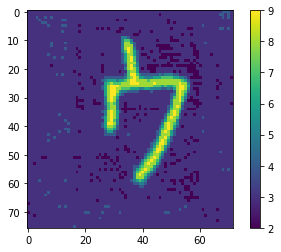

In [14]:
show_image(filename, pos=idx)
idx += 1

In [15]:
total_samples = 0
record_count = {}

for filename in file_list:
    file_stream = bitstring.ConstBitStream(filename=filename)
    pos = 0
    while True:
        try:
            file_stream.bytepos = pos * 2952
            r = file_stream.readlist('2*uint:36,uint:8,pad:28,uint:8,pad:28,4*uint:6,pad:12,15*uint:36,pad:1008,bytes:2736')
        except:
            break
        pos += 1
        total_samples += 1
        record_dict = {
            'character': ''.join([t56s[c] for c in r[4:8]]), # 4 Character Code - [4:8]
            'image_data': r[23], # 16 Gray Level (4bit/pixel) Image Data 72(X-axis size) * 76(Y-axis size) = 5472 pixels - [23]
        }

        name = record_dict['character']

        if name in record_count.keys():
            record_count[name] += 1
        else:
            record_count[name] = 1

In [16]:
total_samples

10608

In [17]:
len(record_count.keys())

51

In [18]:
record_count

{'K  A': 208,
 'K  I': 208,
 'K  U': 208,
 'K  E': 208,
 'K  O': 208,
 'K KA': 208,
 'K KI': 208,
 'K KU': 208,
 'K KE': 208,
 'K KO': 208,
 'K SA': 208,
 'K SI': 208,
 'K SU': 208,
 'K SE': 208,
 'K SO': 208,
 'K TA': 208,
 'K TI': 208,
 'K TU': 208,
 'K TE': 208,
 'K TO': 208,
 'K NA': 208,
 'K NI': 208,
 'K NU': 208,
 'K NE': 208,
 'K NO': 208,
 'K HA': 208,
 'K HI': 208,
 'K HU': 208,
 'K HE': 208,
 'K HO': 208,
 'K MA': 208,
 'K MI': 208,
 'K MU': 208,
 'K ME': 208,
 'K MO': 208,
 'K YA': 208,
 'K YI': 208,
 'K YU': 208,
 'K YE': 208,
 'K YO': 208,
 'K RA': 208,
 'K RI': 208,
 'K RU': 208,
 'K RE': 208,
 'K RO': 208,
 'K WA': 208,
 'K WI': 208,
 'K WU': 208,
 'K WE': 208,
 'K WO': 208,
 'K  N': 208}